In [20]:
%load_ext autoreload
%autoreload 2
import pandas as pd
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
import matplotlib.pyplot as plt
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import Metrica_IO as mio
import Metrica_Viz as mviz

Reading team: home
Reading team: away


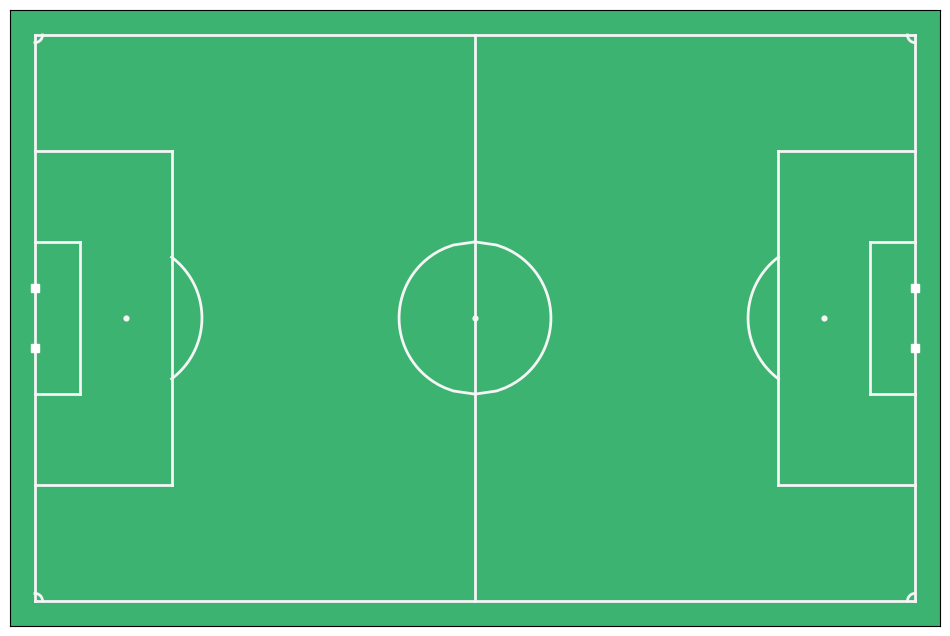

In [22]:
fig,ax = mviz.plot_pitch( field_dimen = (106.0,68.0), field_color ='green', linewidth=2, markersize=20)
DATADIR = os.path.join("sample-data","data")
game_id = 1
events = mio.read_event_data(DATADIR,game_id)
events = mio.to_metric_coordinates(events)
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

In [23]:
goals = events.loc[(events["Subtype"] == "HEAD-ON TARGET-GOAL") | (events["Subtype"] == "ON TARGET-GOAL")]
goals["Subtype"].unique()
goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
34,Home,SHOT,HEAD-ON TARGET-GOAL,1,2289,91.56,2309,92.36,Player9,NaN,44.52,2.04,54.06,-3.40
1114,Home,SHOT,ON TARGET-GOAL,2,90005,3600.20,90026,3601.04,Player10,NaN,-44.52,12.92,-53.00,-2.72
1213,Home,SHOT,ON TARGET-GOAL,2,99032,3961.28,99046,3961.84,Player9,NaN,-50.88,-2.72,-54.06,-0.68


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

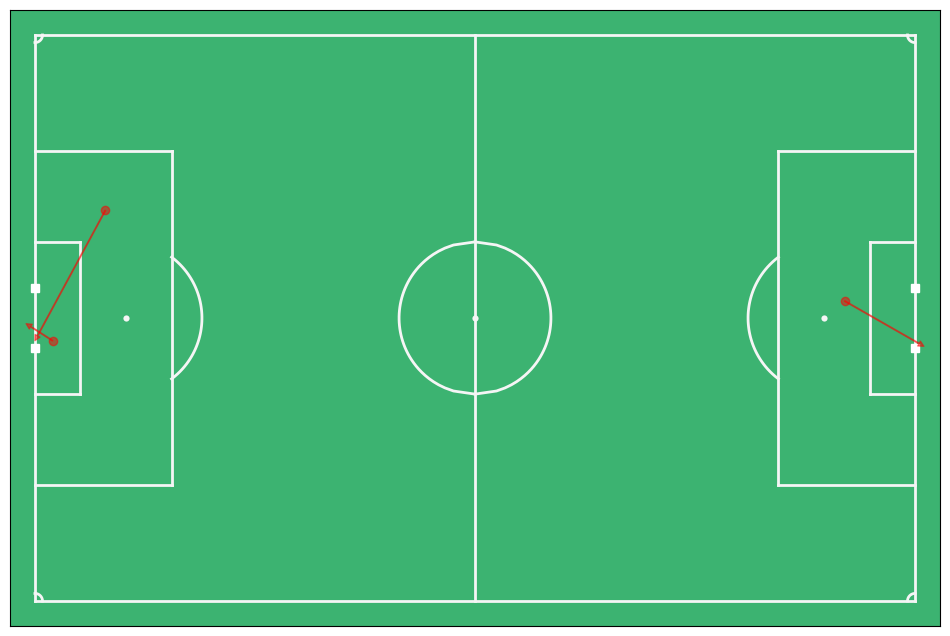

In [24]:
for index, row in goals.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( goals.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )


In [25]:
# List passes for section #1
df = pd.read_csv('Sample_Game_1_RawEventsData.csv')
pd.set_option('display.max_rows', None)
word1 = "PASS"
word2 = "Away"
start_row = 1
end_row = 33
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    subset_df['Type'].str.contains("PASS", case=False) &
    subset_df['Team'].str.contains("Away", case=False) &
    ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)
)
filtered_df = subset_df[mask]
Tied_First_Half = filtered_df
Tied_First_Half

C:\Users\aaldo\AppData\Local\Temp\ipykernel_22872\2851599004.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
5,Away,PASS,NaN,1,191,7.64,217,8.68,Player21,Player22,0.40,0.73,0.32,0.98
6,Away,PASS,NaN,1,279,11.16,303,12.12,Player22,Player17,0.39,0.96,0.49,0.98
19,Away,PASS,NaN,1,763,30.52,784,31.36,Player16,Player19,0.58,0.27,0.51,0.33
20,Away,PASS,NaN,1,784,31.36,804,32.16,Player19,Player20,0.51,0.33,0.57,0.47
21,Away,PASS,NaN,1,834,33.36,881,35.24,Player20,Player22,0.53,0.53,0.44,0.92
22,Away,PASS,NaN,1,976,39.04,1010,40.40,Player22,Player17,0.36,0.96,0.48,0.86


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

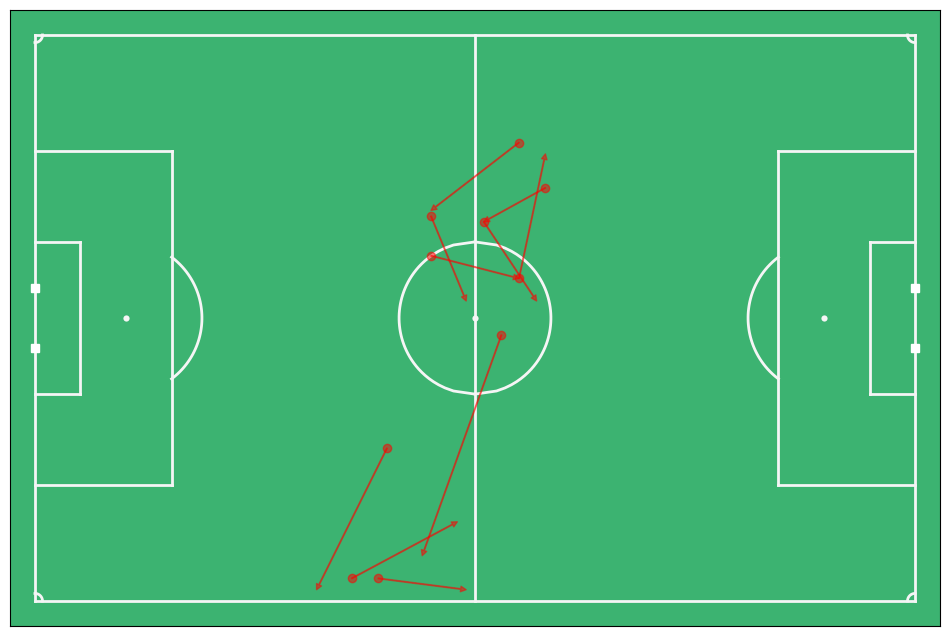

In [26]:
# Graphing all passing in section #1
Tied_First_Half = mio.to_metric_coordinates(Tied_First_Half)
for index, row in Tied_First_Half.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( Tied_First_Half.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [27]:
# How many passes in section #1
num_rows_remaining_A = len(Tied_First_Half)
print(f"Number of rows meeting the criteria: {num_rows_remaining_A}")

Number of rows meeting the criteria: 10


In [28]:
# Impact Factor for section #1
Impact_Factor_A = 0
for index, row in Tied_First_Half.iterrows():
    distance_A = (((row["End X"] - row["Start X"]) ** 2 + (row["End Y"] - row["Start Y"]) ** 2) ** 0.5)
    if distance_A > 0:
        Impact_Factor_A += distance_A
print(Impact_Factor_A)

142.86943224282092


In [29]:
# List passes for section #2
df = pd.read_csv('Sample_Game_1_RawEventsData.csv')
pd.set_option('display.max_rows', None)
word1 = "PASS"
word2 = "Away"
start_row = 34
end_row = 888
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    subset_df['Type'].str.contains("PASS", case=False) &
    subset_df['Team'].str.contains("Away", case=False) &
    ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)
)
filtered_df = subset_df[mask]
Down_One_First_Half = filtered_df
Down_One_First_Half

C:\Users\aaldo\AppData\Local\Temp\ipykernel_22872\1116464340.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
36,Away,PASS,NaN,1,3675,147.00,3703,148.12,Player19,Player21,0.49,0.50,0.58,0.52
37,Away,PASS,NaN,1,3780,151.20,3805,152.20,Player21,Player20,0.57,0.53,0.58,0.73
38,Away,PASS,NaN,1,3829,153.16,3854,154.16,Player20,Player22,0.57,0.76,0.52,0.98
39,Away,PASS,NaN,1,3882,155.28,3907,156.28,Player22,Player17,0.55,0.95,0.69,0.87
40,Away,PASS,NaN,1,3930,157.20,3994,159.76,Player17,Player25,0.71,0.86,0.93,0.55
54,Away,PASS,NaN,1,5057,202.28,5081,203.24,Player22,Player19,0.58,1.01,0.57,0.89
67,Away,PASS,NaN,1,5431,217.24,5471,218.84,Player20,Player18,0.55,0.83,0.45,0.50
86,Away,PASS,NaN,1,6863,274.52,6886,275.44,Player21,Player20,0.53,0.29,0.54,0.37
88,Away,PASS,NaN,1,6905,276.20,6946,277.84,Player20,Player22,0.52,0.41,0.46,0.78
96,Away,PASS,NaN,1,7203,288.12,7266,290.64,Player18,Player21,0.13,0.01,0.20,0.11


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

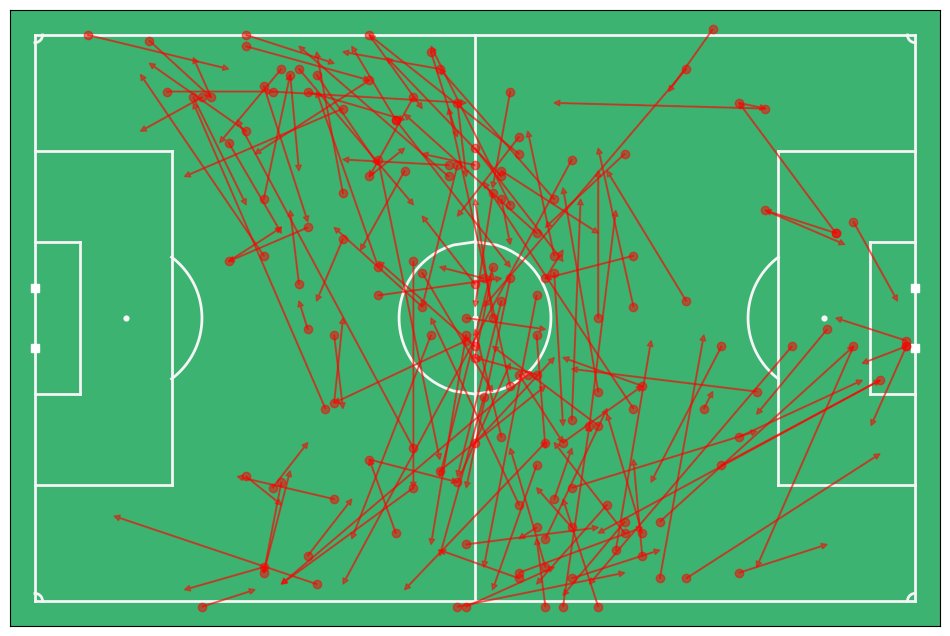

In [30]:
# Graphing all passes in section #2
Down_One_First_Half = mio.to_metric_coordinates(Down_One_First_Half)
for index, row in Down_One_First_Half.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( Down_One_First_Half.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [31]:
# How many passes in section #2
num_rows_remaining_B = len(Down_One_First_Half)
print(f"Number of rows meeting the criteria: {num_rows_remaining_B}")

Number of rows meeting the criteria: 160


In [32]:
# Impact Factor for section #2
Impact_Factor_B = 0
for index, row in Down_One_First_Half.iterrows():
    distance_B = (((row["End X"] - row["Start X"]) ** 2 + (row["End Y"] - row["Start Y"]) ** 2) ** 0.5)
    if distance_B > 0:
        Impact_Factor_B += distance_B
print(Impact_Factor_B)

2637.689214145296


In [33]:
# List passes for section #3
df = pd.read_csv('Sample_Game_1_RawEventsData.csv')
pd.set_option('display.max_rows', None)
word1 = "PASS"
word2 = "Away"
start_row = 889
end_row = 1114
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    subset_df['Type'].str.contains("PASS", case=False) &
    subset_df['Team'].str.contains("Away", case=False) &
    ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)
)
filtered_df = subset_df[mask]
Down_One_Second_Half = filtered_df
Down_One_Second_Half

C:\Users\aaldo\AppData\Local\Temp\ipykernel_22872\7440347.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
896,Away,PASS,NaN,2,72279,2891.16,72307,2892.28,Player20,Player18,0.43,0.25,0.49,0.33
897,Away,PASS,NaN,2,72315,2892.60,72358,2894.32,Player18,Player22,0.50,0.32,0.62,0.03
898,Away,PASS,NaN,2,72358,2894.32,72384,2895.36,Player22,Player23,0.62,0.03,0.67,0.20
901,Away,PASS,NaN,2,72465,2898.60,72483,2899.32,Player23,Player22,0.67,0.19,0.75,0.02
908,Away,PASS,NaN,2,72820,2912.80,72863,2914.52,Player16,Player21,0.30,0.20,0.34,0.33
909,Away,PASS,NaN,2,72895,2915.80,72948,2917.92,Player21,Player15,0.34,0.38,0.33,0.80
910,Away,PASS,NaN,2,73040,2921.60,73068,2922.72,Player15,Player17,0.51,0.83,0.64,1.01
911,Away,PASS,NaN,2,73135,2925.40,73165,2926.60,Player17,Player21,0.65,0.96,0.60,0.75
912,Away,PASS,NaN,2,73204,2928.16,73234,2929.36,Player21,Player18,0.60,0.69,0.61,0.45
913,Away,PASS,NaN,2,73312,2932.48,73364,2934.56,Player18,Player22,0.68,0.37,0.79,0.04


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

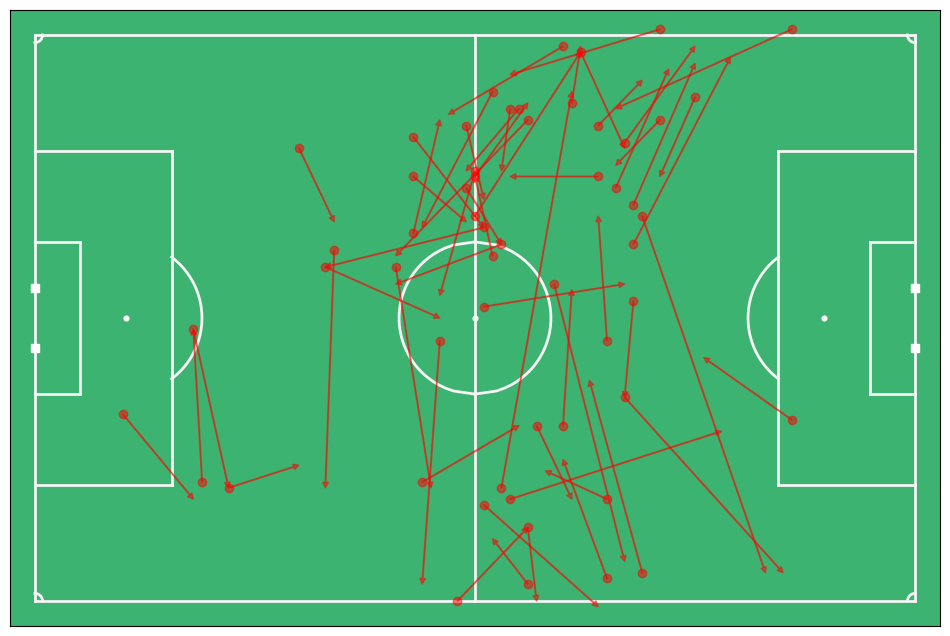

In [34]:
# Graphing all passes in section #3
Down_One_Second_Half = mio.to_metric_coordinates(Down_One_Second_Half)
for index, row in Down_One_Second_Half.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( Down_One_Second_Half.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [35]:
# How many passes in section #3
num_rows_remaining_C = len(Down_One_Second_Half)
print(f"Number of rows meeting the criteria: {num_rows_remaining_C}")

Number of rows meeting the criteria: 56


In [36]:
# Impact Factor for section #3
Impact_Factor_C = 0
for index, row in Down_One_Second_Half.iterrows():
    distance_C = (((row["End X"] - row["Start X"]) ** 2 + (row["End Y"] - row["Start Y"]) ** 2) ** 0.5)
    if distance_C > 0:
        Impact_Factor_C += distance_C
print(Impact_Factor_C)

935.5716560550178


In [37]:
# List passes for section #4
pd.set_option('display.max_rows', None)
word1 = "PASS"
word2 = "Away"
start_row = 1114
end_row = 1213
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    subset_df['Type'].str.contains("PASS", case=False) &
    subset_df['Team'].str.contains("Away", case=False) &
    ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)
)
filtered_df = subset_df[mask]
Down_Two_Second_Half = filtered_df
Down_Two_Second_Half

C:\Users\aaldo\AppData\Local\Temp\ipykernel_22872\973442604.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1116,Away,PASS,NaN,2,91705,3668.20,91731,3669.24,Player19,Player21,0.50,0.51,0.42,0.48
1117,Away,PASS,NaN,2,91815,3672.60,91857,3674.28,Player21,Player17,0.46,0.56,0.51,0.95
1118,Away,PASS,NaN,2,91885,3675.40,91908,3676.32,Player17,Player15,0.48,0.93,0.37,0.84
1153,Away,PASS,NaN,2,93896,3755.84,93951,3758.04,Player25,Player19,0.10,0.42,0.36,0.80
1154,Away,PASS,NaN,2,94130,3765.20,94160,3766.40,Player19,Player17,0.60,0.86,0.53,0.94
1155,Away,PASS,NaN,2,94177,3767.08,94215,3768.60,Player17,Player19,0.53,0.94,0.64,0.97
1156,Away,PASS,NaN,2,94350,3774.00,94373,3774.92,Player19,Player21,0.63,0.94,0.61,0.73
1157,Away,PASS,NaN,2,94391,3775.64,94434,3777.36,Player21,Player16,0.61,0.71,0.50,0.51
1158,Away,PASS,NaN,2,94502,3780.08,94524,3780.96,Player16,Player20,0.56,0.42,0.57,0.26
1159,Away,PASS,NaN,2,94578,3783.12,94623,3784.92,Player20,Player22,0.64,0.23,0.77,0.05


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

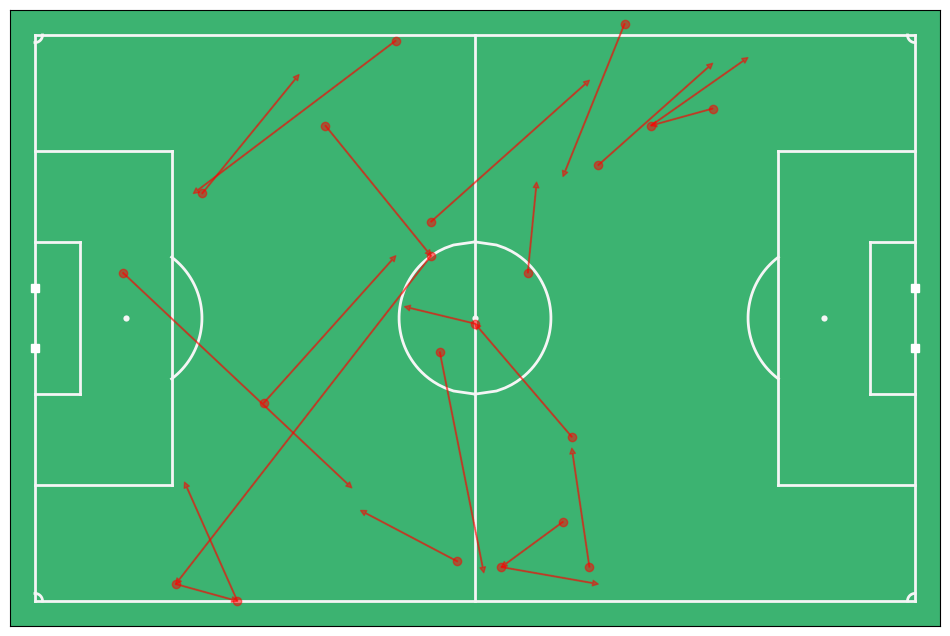

In [38]:
# Graphing all passes in section #4
Down_Two_Second_Half = mio.to_metric_coordinates(Down_Two_Second_Half)
for index, row in Down_Two_Second_Half.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( Down_Two_Second_Half.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [39]:
# How many passes in section #4
num_rows_remaining_D = len(Down_Two_Second_Half)
print(f"Number of rows meeting the criteria: {num_rows_remaining_D}")

Number of rows meeting the criteria: 21


In [40]:
# Impact Factor for section #4
Impact_Factor_D = 0
for index, row in Down_Two_Second_Half.iterrows():
    distance_D = (((row["End X"] - row["Start X"]) ** 2 + (row["End Y"] - row["Start Y"]) ** 2) ** 0.5)
    if distance_D > 0:
        Impact_Factor_D += distance_D
print(Impact_Factor_D)

402.97481380558514


In [41]:
# List passes for section #5
pd.set_option('display.max_rows', None)
word1 = "PASS"
word2 = "Away"
start_row = 1213
end_row = 1745
subset_df = df.iloc[start_row - 1:end_row] 
mask = (
    subset_df['Type'].str.contains("PASS", case=False) &
    subset_df['Team'].str.contains("Away", case=False) &
    ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)
)
filtered_df = subset_df[mask]
Down_Three_Second_Half = filtered_df
Down_Three_Second_Half

C:\Users\aaldo\AppData\Local\Temp\ipykernel_22872\2494322814.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ~subset_df['Subtype'].str.contains(r'\b(GOAL|DEEP|HEAD|CLEARANCE)\b', case=False, na=False)


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1215,Away,PASS,NaN,2,100653,4026.12,100675,4027.00,Player19,Player21,0.50,0.51,0.42,0.47
1216,Away,PASS,NaN,2,100798,4031.92,100833,4033.32,Player21,Player22,0.57,0.27,0.61,0.06
1217,Away,PASS,NaN,2,100847,4033.88,100877,4035.08,Player22,Player20,0.61,0.05,0.50,0.20
1218,Away,PASS,NaN,2,100892,4035.68,100919,4036.76,Player20,Player16,0.49,0.21,0.43,0.44
1219,Away,PASS,NaN,2,100965,4038.60,101002,4040.08,Player16,Player15,0.44,0.50,0.45,0.79
1224,Away,PASS,NaN,2,101228,4049.12,101276,4051.04,Player16,Player25,0.38,0.70,0.15,0.52
1225,Away,PASS,NaN,2,101352,4054.08,101390,4055.60,Player25,Player20,0.19,0.51,0.35,0.24
1226,Away,PASS,NaN,2,101419,4056.76,101454,4058.16,Player20,Player22,0.37,0.23,0.56,0.07
1227,Away,PASS,NaN,2,101490,4059.60,101522,4060.88,Player22,Player23,0.57,0.06,0.71,0.31
1239,Away,PASS,NaN,2,102995,4119.80,103025,4121.00,Player21,Player16,0.14,0.30,0.06,0.40


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

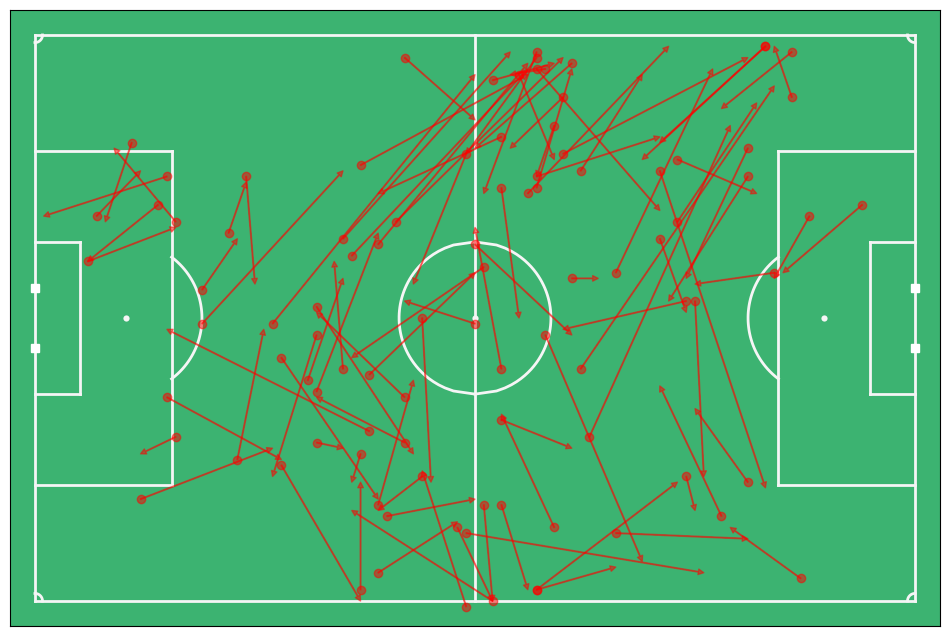

In [42]:
# Graphing all passes in section #5
Down_Three_Second_Half = mio.to_metric_coordinates(Down_Three_Second_Half)
for index, row in Down_Three_Second_Half.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( Down_Three_Second_Half.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [43]:
# How many passes in section #5
num_rows_remaining = len(Down_Three_Second_Half)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 96


In [44]:
# Impact Factor for section #5
Impact_Factor_E = 0
for index, row in Down_Three_Second_Half.iterrows():
    distance_E = (((row["End X"] - row["Start X"]) ** 2 + (row["End Y"] - row["Start Y"]) ** 2) ** 0.5)
    if distance_E > 0:
        Impact_Factor_E += distance_E
print(Impact_Factor_E)

1544.5655203892795


In [45]:
# List of Home Shots in first quarter
pd.set_option('display.max_rows', None)
word1 = "SHOT"
word2 = "Home"
start_row = 1
end_row = 447
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains(word1, case=False) &
    subset_df['Team'].str.contains(word2, case=False)) 
)
filtered_df = subset_df[mask]
HOME_SHOTS1 = filtered_df
HOME_SHOTS1

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
34,Home,SHOT,HEAD-ON TARGET-GOAL,1,2289,91.56,2309,92.36,Player9,NaN,0.92,0.47,1.01,0.55
79,Home,SHOT,OFF TARGET-OUT,1,5923,236.92,5953,238.12,Player10,NaN,0.84,0.27,1.04,0.60
135,Home,SHOT,ON TARGET-SAVED,1,9628,385.12,9632,385.28,Player8,NaN,0.96,0.37,0.98,0.46
239,Home,SHOT,HEAD-OFF TARGET-OUT,1,18270,730.80,18301,732.04,Player8,NaN,0.94,0.55,1.03,0.61
362,Home,SHOT,HEAD-OFF TARGET-OUT,1,26608,1064.32,26636,1065.44,Player8,NaN,0.95,0.53,1.03,0.47
425,Home,SHOT,OFF TARGET-OUT,1,31190,1247.60,31235,1249.40,Player7,NaN,0.75,0.37,1.05,0.59


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

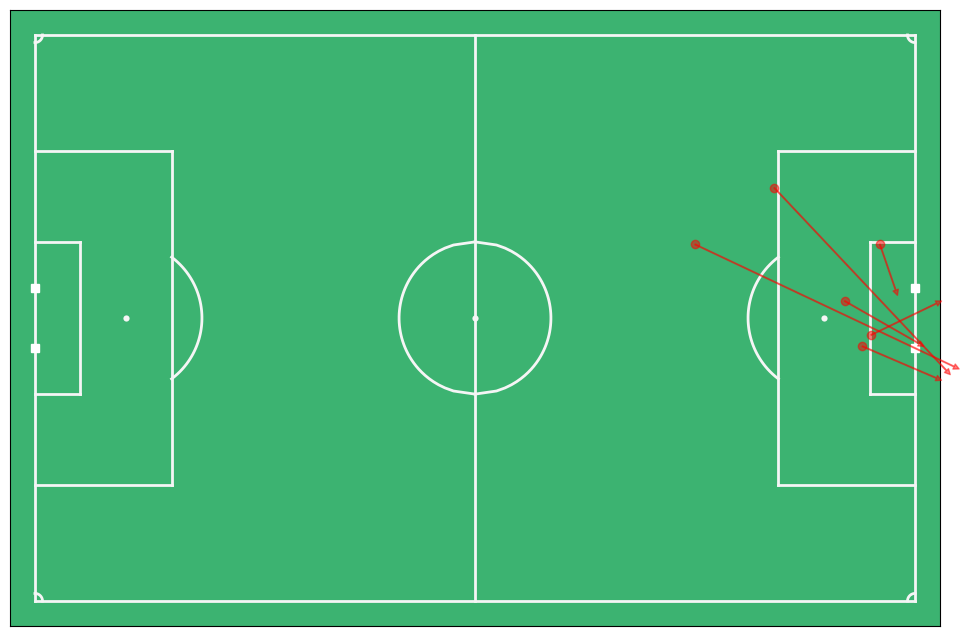

In [46]:
# Graphing all home shots in first quarter
HOME_SHOTS1 = mio.to_metric_coordinates(HOME_SHOTS1)
for index, row in HOME_SHOTS1.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( HOME_SHOTS1.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [47]:
# List of Home Shots in second quarter
pd.set_option('display.max_rows', None)
word1 = "SHOT"
word2 = "Home"
start_row = 448
end_row = 892
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains(word1, case=False) &
    subset_df['Team'].str.contains(word2, case=False)) 
)
filtered_df = subset_df[mask]
HOME_SHOTS2 = filtered_df
HOME_SHOTS2

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
662,Home,SHOT,HEAD-ON TARGET-SAVED,1,53695,2147.80,53707,2148.28,Player8,NaN,0.94,0.52,1.00,0.54
667,Home,SHOT,BLOCKED,1,53775,2151.00,53775,2151.00,Player5,NaN,0.86,0.72,0.89,0.73
730,Home,SHOT,OFF TARGET-OUT,1,57668,2306.72,57740,2309.60,Player7,NaN,0.81,0.73,1.02,0.31
774,Home,SHOT,OFF TARGET-OUT,1,62792,2511.68,62847,2513.88,Player10,NaN,0.71,0.52,1.02,0.27
845,Home,SHOT,HEAD-ON TARGET-SAVED,1,67502,2700.08,67513,2700.52,Player9,NaN,0.98,0.60,1.00,0.54


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

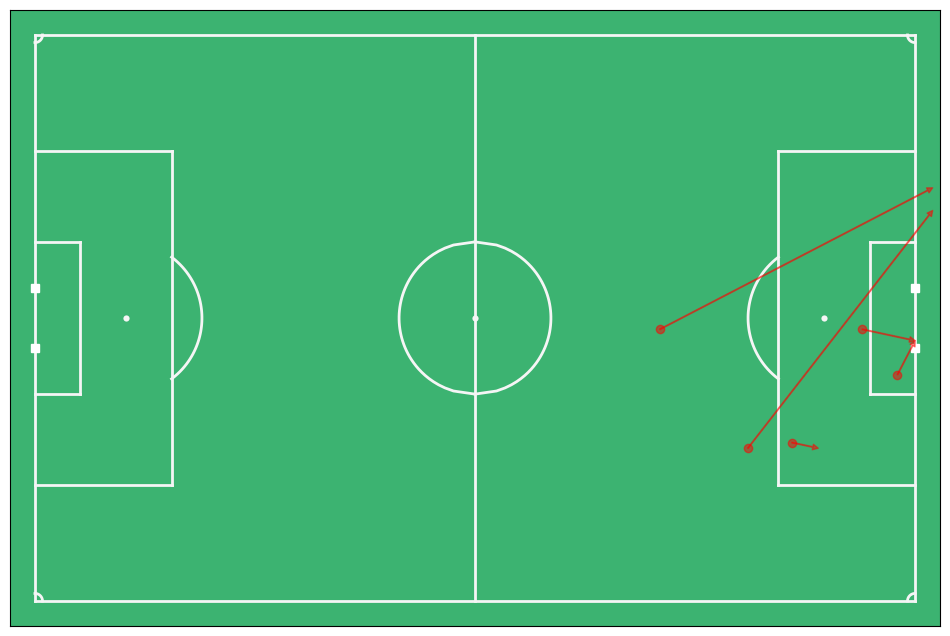

In [48]:
# Graphing home shots in second quarter
HOME_SHOTS2 = mio.to_metric_coordinates(HOME_SHOTS2)
for index, row in HOME_SHOTS2.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( HOME_SHOTS2.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [49]:
# List of Home Shots in third quarter
pd.set_option('display.max_rows', None)
word1 = "SHOT"
word2 = "Home"
start_row = 893
end_row = 1226
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains(word1, case=False) &
    subset_df['Team'].str.contains(word2, case=False)) 
)
filtered_df = subset_df[mask]
HOME_SHOTS3 = filtered_df
HOME_SHOTS3

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
961,Home,SHOT,HEAD-WOODWORK-OUT,2,77048,3081.92,77071,3082.84,Player12,NaN,0.06,0.41,-0.02,0.46
1114,Home,SHOT,ON TARGET-GOAL,2,90005,3600.20,90026,3601.04,Player10,NaN,0.08,0.31,0.00,0.54
1209,Home,SHOT,ON TARGET-SAVED,2,99005,3960.20,99014,3960.56,Player5,NaN,0.04,0.36,0.00,0.45
1213,Home,SHOT,ON TARGET-GOAL,2,99032,3961.28,99046,3961.84,Player9,NaN,0.02,0.54,-0.01,0.51


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

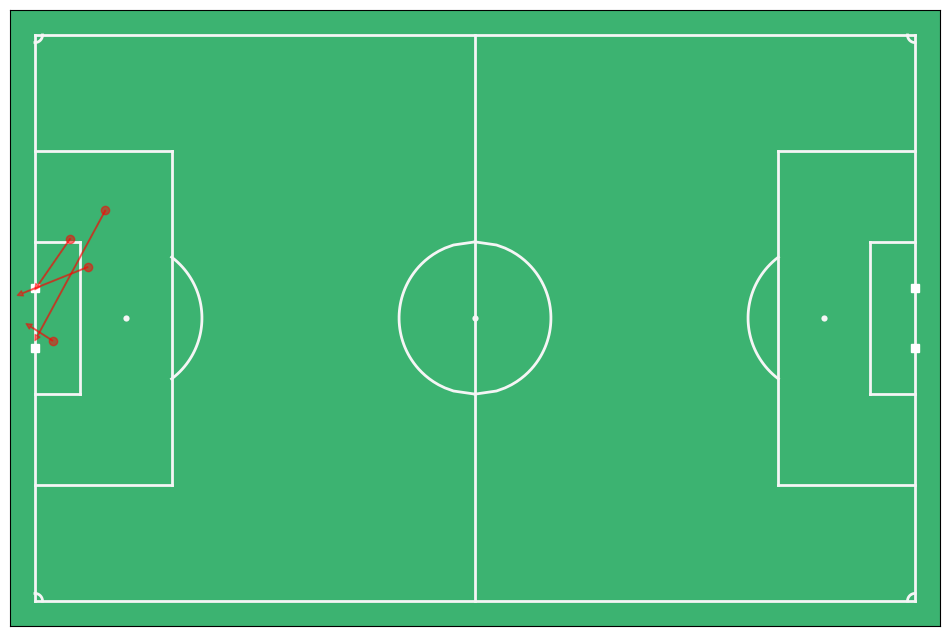

In [50]:
# Graphing home shots in third quarter
HOME_SHOTS3 = mio.to_metric_coordinates(HOME_SHOTS3)
for index, row in HOME_SHOTS3.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( HOME_SHOTS3.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [51]:
# List of Home Shots in fourth quarter
pd.set_option('display.max_rows', None)
word1 = "SHOT"
word2 = "Home"
start_row = 1227
end_row = 1775
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains(word1, case=False) &
    subset_df['Team'].str.contains(word2, case=False)) 
)
filtered_df = subset_df[mask]
HOME_SHOTS4 = filtered_df
HOME_SHOTS4

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1458,Home,SHOT,OFF TARGET-OUT,2,118911,4756.44,118924,4756.96,Player10,NaN,0.08,0.31,-0.03,0.42
1493,Home,SHOT,OFF TARGET-OUT,2,122923,4916.92,122930,4917.20,Player14,NaN,0.25,0.49,-0.02,0.60
1664,Home,SHOT,OFF TARGET,2,135957,5438.28,136022,5440.88,Player9,NaN,0.16,0.56,0.02,0.59


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

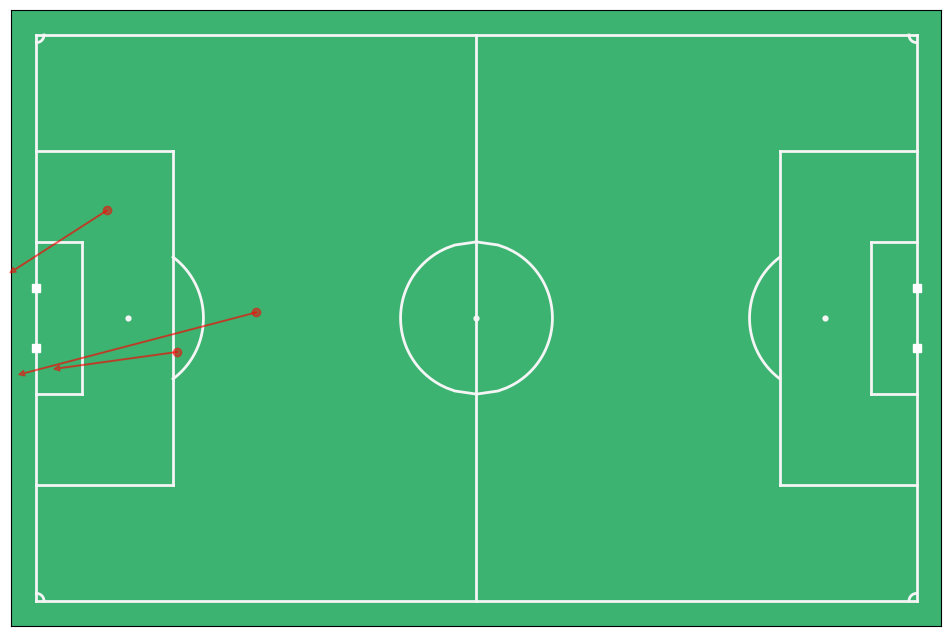

In [52]:
# Graphing all home shots in the fourth quarter
HOME_SHOTS4 = mio.to_metric_coordinates(HOME_SHOTS4)
for index, row in HOME_SHOTS4.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( HOME_SHOTS4.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [53]:
# List of Away Shots in first quarter
pd.set_option('display.max_rows', None)
word1 = "SHOT"
word2 = "Away"
start_row = 1
end_row = 447
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains(word1, case=False) &
    subset_df['Team'].str.contains(word2, case=False)) 
)
filtered_df = subset_df[mask]
AWAY_SHOTS1 = filtered_df
AWAY_SHOTS1

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
110,Away,SHOT,OFF TARGET-OUT,1,7753,310.12,7789,311.56,Player21,NaN,0.20,0.30,-0.04,0.65
254,Away,SHOT,ON TARGET-SAVED,1,19470,778.80,19483,779.32,Player24,NaN,0.13,0.37,0.02,0.48


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

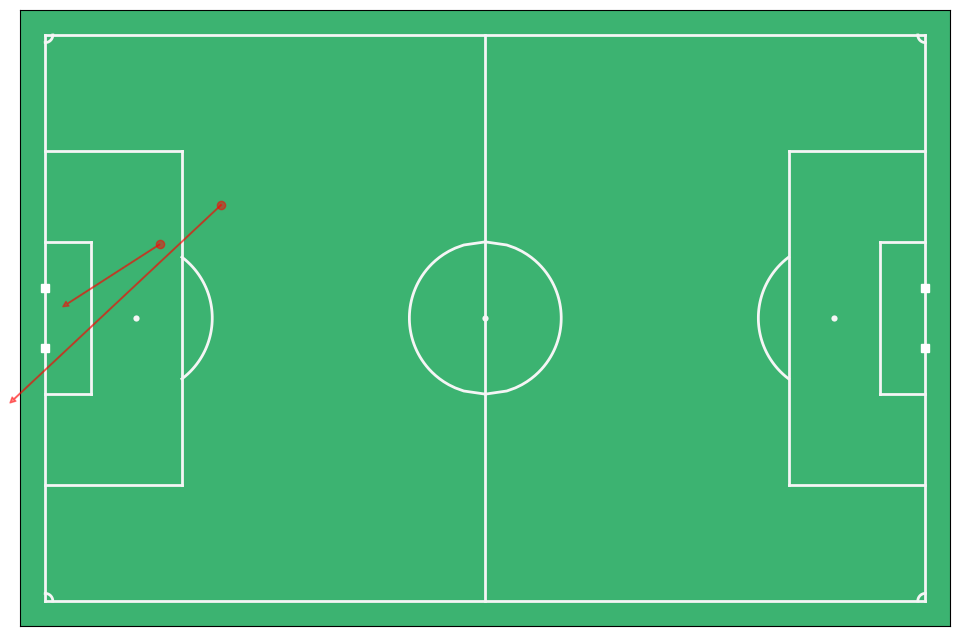

In [54]:
# Graphing Away Shots in first quarter
AWAY_SHOTS1 = mio.to_metric_coordinates(AWAY_SHOTS1)
for index, row in AWAY_SHOTS1.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( AWAY_SHOTS1.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [55]:
# List of Away Shots in second quarter
pd.set_option('display.max_rows', None)
word1 = "SHOT"
word2 = "Away"
start_row = 448
end_row = 892
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains(word1, case=False) &
    subset_df['Team'].str.contains(word2, case=False)) 
)
filtered_df = subset_df[mask]
AWAY_SHOTS2 = filtered_df
AWAY_SHOTS2

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

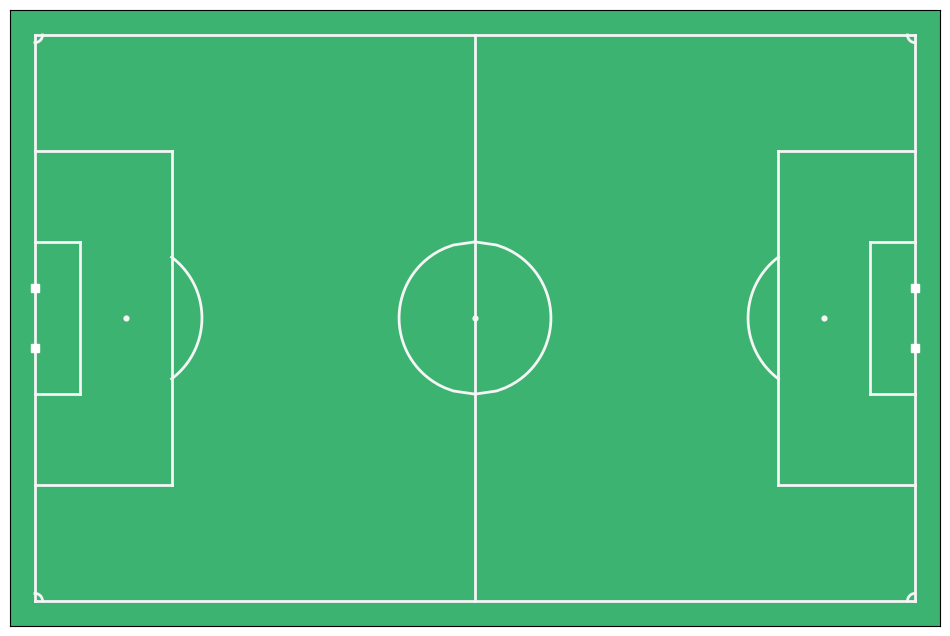

In [56]:
# Grapghing Away shots in second quarter
AWAY_SHOTS2 = mio.to_metric_coordinates(AWAY_SHOTS2)
for index, row in AWAY_SHOTS2.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( AWAY_SHOTS2.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [57]:
# List of Away Shots in the third quarter
pd.set_option('display.max_rows', None)
word1 = "SHOT"
word2 = "Away"
start_row = 893
end_row = 1226
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains(word1, case=False) &
    subset_df['Team'].str.contains(word2, case=False)) 
)
filtered_df = subset_df[mask]
AWAY_SHOTS3 = filtered_df
AWAY_SHOTS3

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
939,Away,SHOT,ON TARGET-SAVED,2,75262,3010.48,75284,3011.36,Player19,NaN,0.76,0.57,0.99,0.48


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

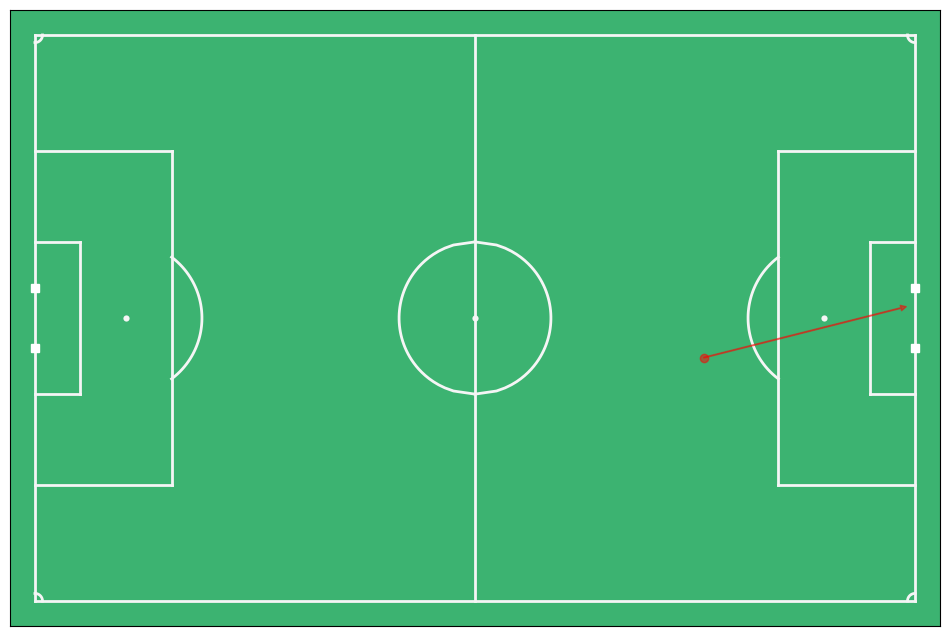

In [58]:
# Graphing away shots in third quarter
AWAY_SHOTS3 = mio.to_metric_coordinates(AWAY_SHOTS3)
for index, row in AWAY_SHOTS3.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( AWAY_SHOTS3.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [59]:
# List of Away Shots in fourth quarter
pd.set_option('display.max_rows', None)
word1 = "SHOT"
word2 = "Away"
start_row = 1227
end_row = 1775
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains(word1, case=False) &
    subset_df['Team'].str.contains(word2, case=False)) 
)
filtered_df = subset_df[mask]
AWAY_SHOTS4 = filtered_df
AWAY_SHOTS4

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1328,Away,SHOT,ON TARGET-SAVED,2,108611,4344.44,108628,4345.12,Player27,NaN,0.92,0.28,0.99,0.51
1525,Away,SHOT,OFF TARGET-OUT,2,124755,4990.20,124775,4991.00,Player23,NaN,0.85,0.41,1.03,0.42
1647,Away,SHOT,OFF TARGET-OUT,2,134041,5361.64,134076,5363.04,Player28,NaN,0.73,0.65,1.02,0.64


C:\Users\aaldo\Project1\Metrica_IO.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x_columns] = (data[x_columns]-0.5) * field_dimen[0]
C:\Users\aaldo\Project1\Metrica_IO.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_columns] = -1 * (data[y_columns]-0.5) * field_dimen[1]


(<Figure size 1200x800 with 1 Axes>, <Axes: >)

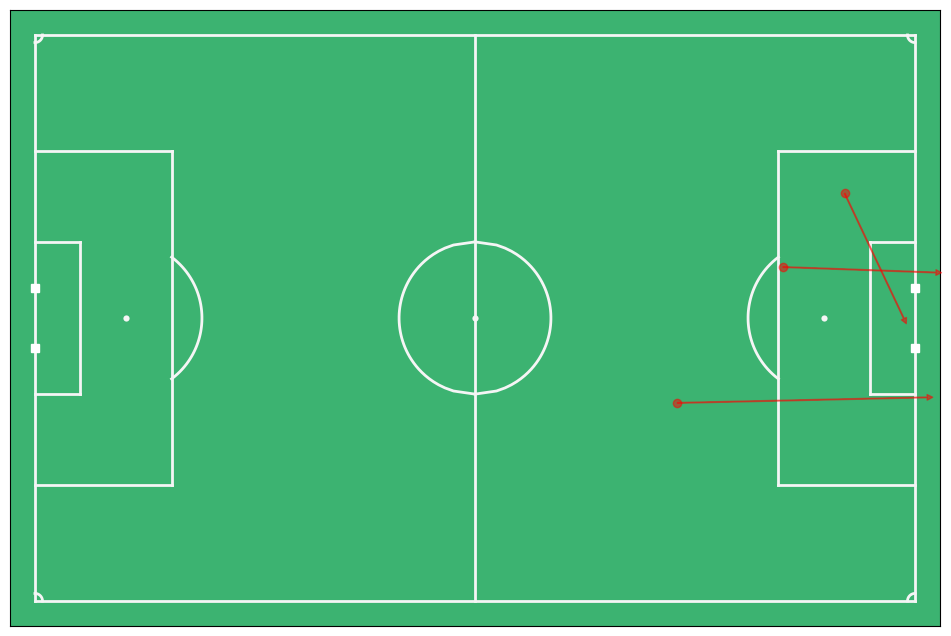

In [60]:
# Graphing Away shots in the fourth quarter
AWAY_SHOTS4 = mio.to_metric_coordinates(AWAY_SHOTS4)
for index, row in AWAY_SHOTS4.iterrows():
    if index > 1741: continue    
    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
mviz.plot_events( AWAY_SHOTS4.iloc[0:1741], indicators = ['Marker','Arrow'], annotate=False )

In [61]:
# List of times home team lost the ball in the first quarter
pd.set_option('display.max_rows', None)
start_row = 1
end_row = 448
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains("LOST", case=False) &
    subset_df['Team'].str.contains("Home", case=False)) 
)
filtered_df = subset_df[mask]
HOME_INTERCEPTION1 = filtered_df
HOME_INTERCEPTION1

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
9,Home,BALL LOST,INTERCEPTION,1,378,15.12,452,18.08,Player2,NaN,0.27,0.78,0.59,0.64
17,Home,BALL LOST,INTERCEPTION,1,572,22.88,616,24.64,Player10,NaN,0.50,0.65,0.67,0.44
28,Home,BALL LOST,INTERCEPTION,1,1370,54.80,1375,55.00,Player8,NaN,0.86,0.26,0.88,0.28
44,Home,BALL LOST,NaN,1,4445,177.80,4453,178.12,Player10,NaN,0.55,0.84,0.57,0.78
48,Home,BALL LOST,INTERCEPTION,1,4620,184.80,4679,187.16,Player1,NaN,0.37,0.97,0.65,0.92
58,Home,BALL LOST,INTERCEPTION,1,5202,208.08,5228,209.12,Player1,NaN,0.32,0.89,0.33,0.84
64,Home,BALL LOST,INTERCEPTION,1,5316,212.64,5384,215.36,Player1,NaN,0.26,0.96,0.64,0.88
70,Home,BALL LOST,INTERCEPTION,1,5520,220.80,5550,222.00,Player4,NaN,0.30,0.43,0.28,0.52
87,Home,BALL LOST,INTERCEPTION,1,6864,274.56,6885,275.40,Player6,NaN,0.54,0.30,0.55,0.37
94,Home,BALL LOST,NaN,1,7199,287.96,7204,288.16,Player4,NaN,0.10,0.01,0.14,0.02


In [62]:
# How many interceptions in HOME_INTERCEPTION1
num_rows_remaining = len(HOME_INTERCEPTION1)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 43


In [63]:
# List of times Home team lost the ball in the second quarter
pd.set_option('display.max_rows', None)
start_row = 448
end_row = 892
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains("LOST", case=False) &
    subset_df['Team'].str.contains("Home", case=False)) 
)
filtered_df = subset_df[mask]
HOME_INTERCEPTION2 = filtered_df
HOME_INTERCEPTION2

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
447,Home,BALL LOST,NaN,1,33823,1352.92,33846,1353.84,Player1,NaN,0.57,0.98,0.62,0.83
463,Home,BALL LOST,NaN,1,34980,1399.20,35042,1401.68,Player4,NaN,0.27,0.04,0.54,0.45
472,Home,BALL LOST,INTERCEPTION,1,36212,1448.48,36335,1453.40,Player11,NaN,0.01,0.50,0.58,0.25
479,Home,BALL LOST,INTERCEPTION,1,36410,1456.40,36410,1456.40,Player8,NaN,0.59,0.12,NaN,NaN
503,Home,BALL LOST,NaN,1,38142,1525.68,38232,1529.28,Player11,NaN,0.12,0.14,0.70,0.39
525,Home,BALL LOST,NaN,1,42660,1706.40,42715,1708.60,Player7,NaN,0.41,0.96,0.75,0.64
533,Home,BALL LOST,INTERCEPTION,1,43270,1730.80,43324,1732.96,Player2,NaN,0.45,0.95,0.75,0.76
543,Home,BALL LOST,INTERCEPTION,1,44270,1770.80,44355,1774.20,Player7,NaN,0.48,0.95,0.84,0.42
551,Home,BALL LOST,INTERCEPTION,1,44429,1777.16,44429,1777.16,Player5,NaN,0.80,0.39,NaN,NaN
558,Home,BALL LOST,INTERCEPTION,1,44858,1794.32,44861,1794.44,Player7,NaN,0.39,0.96,0.37,0.96


In [64]:
# How many interceptions in HOME_INTERCEPTION2
num_rows_remaining = len(HOME_INTERCEPTION2)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 30


In [65]:
# List of times Home team lost the ball in the third quarter
pd.set_option('display.max_rows', None)
start_row = 893
end_row = 1226
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains("LOST", case=False) &
    subset_df['Team'].str.contains("Home", case=False)) 
)
filtered_df = subset_df[mask]
HOME_INTERCEPTION3 = filtered_df
HOME_INTERCEPTION3

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
894,Home,BALL LOST,INTERCEPTION,2,72189,2887.56,72237,2889.48,Player6,NaN,0.61,0.50,0.38,0.19
904,Home,BALL LOST,NaN,2,72602,2904.08,72695,2907.80,Player2,NaN,0.74,0.18,0.35,0.14
955,Home,BALL LOST,CROSS-INTERCEPTION,2,76292,3051.68,76298,3051.92,Player7,NaN,0.10,0.10,0.07,0.16
964,Home,BALL LOST,HEAD,2,77581,3103.24,77625,3105.00,Player8,NaN,0.47,0.88,0.40,0.70
976,Home,BALL LOST,NaN,2,78321,3132.84,78321,3132.84,Player12,NaN,0.49,0.35,NaN,NaN
990,Home,BALL LOST,INTERCEPTION,2,79724,3188.96,79780,3191.20,Player4,NaN,0.85,0.98,0.60,0.66
1004,Home,BALL LOST,INTERCEPTION,2,80402,3216.08,80437,3217.48,Player5,NaN,0.21,0.39,0.09,0.40
1022,Home,BALL LOST,CROSS-INTERCEPTION,2,81551,3262.04,81573,3262.92,Player10,NaN,0.15,0.14,0.08,0.44
1028,Home,BALL LOST,INTERCEPTION,2,82477,3299.08,82526,3301.04,Player2,NaN,0.11,0.67,0.06,0.62
1070,Home,BALL LOST,THEFT,2,84924,3396.96,84924,3396.96,Player7,NaN,0.62,0.03,NaN,NaN


In [66]:
# How many interceptions in HOME_INTERCEPTION3
num_rows_remaining = len(HOME_INTERCEPTION3)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 22


In [67]:
# List of times Home team lost the ball in the fourth quarter
pd.set_option('display.max_rows', None)
start_row = 1227
end_row = 1775
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains("LOST", case=False) &
    subset_df['Team'].str.contains("Home", case=False)) 
)
filtered_df = subset_df[mask]
HOME_INTERCEPTION4 = filtered_df
HOME_INTERCEPTION4

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1236,Home,BALL LOST,CROSS-INTERCEPTION,2,102915,4116.60,102950,4118.00,Player10,NaN,0.19,0.08,0.11,0.44
1255,Home,BALL LOST,INTERCEPTION,2,103918,4156.72,103918,4156.72,Player8,NaN,0.18,0.73,0.14,0.61
1258,Home,BALL LOST,INTERCEPTION,2,104039,4161.56,104069,4162.76,Player12,NaN,0.27,0.89,0.33,0.50
1283,Home,BALL LOST,INTERCEPTION,2,105620,4224.80,105645,4225.80,Player7,NaN,0.56,0.08,0.54,0.22
1304,Home,BALL LOST,INTERCEPTION,2,107694,4307.76,107754,4310.16,Player5,NaN,0.19,0.09,0.09,0.41
1311,Home,BALL LOST,INTERCEPTION,2,107832,4313.28,107850,4314.00,Player7,NaN,0.36,0.15,0.38,0.21
1321,Home,BALL LOST,THEFT,2,108222,4328.88,108229,4329.16,Player5,NaN,0.51,0.10,0.54,0.11
1333,Home,BALL LOST,THEFT,2,109058,4362.32,109088,4363.52,Player8,NaN,0.16,0.39,0.20,0.41
1358,Home,BALL LOST,INTERCEPTION,2,113390,4535.60,113448,4537.92,Player3,NaN,0.77,0.56,0.47,0.30
1369,Home,BALL LOST,CLEARANCE,2,113862,4554.48,113954,4558.16,Player2,NaN,0.81,0.40,0.64,0.89


In [68]:
# How many interceptions in HOME_INTERCEPTION4
num_rows_remaining = len(HOME_INTERCEPTION4)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 35


In [69]:
# List of times Away team lost the ball in the first quarter
pd.set_option('display.max_rows', None)
start_row = 1
end_row = 447
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains("LOST", case=False) &
    subset_df['Team'].str.contains("Away", case=False)) 
)
filtered_df = subset_df[mask]
AWAY_INTERCEPTION1 = filtered_df
AWAY_INTERCEPTION1

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
7,Away,BALL LOST,INTERCEPTION,1,346,13.84,380,15.20,Player17,NaN,0.51,0.97,0.27,0.75
11,Away,BALL LOST,HEAD-INTERCEPTION,1,453,18.12,497,19.88,Player16,NaN,0.57,0.67,0.33,0.65
23,Away,BALL LOST,INTERCEPTION,1,1110,44.40,1134,45.36,Player17,NaN,0.42,0.79,0.31,0.84
46,Away,BALL LOST,INTERCEPTION,1,4489,179.56,4518,180.72,Player19,NaN,0.54,0.87,0.48,0.85
50,Away,BALL LOST,INTERCEPTION,1,4709,188.36,4749,189.96,Player17,NaN,0.60,0.95,0.36,0.78
55,Away,BALL LOST,INTERCEPTION,1,5081,203.24,5150,206.00,Player19,NaN,0.57,0.89,0.25,0.84
62,Away,BALL LOST,NaN,1,5228,209.12,5263,210.52,Player19,NaN,0.36,0.83,0.28,0.83
68,Away,BALL LOST,NaN,1,5507,220.28,5517,220.68,Player18,NaN,0.38,0.47,0.28,0.41
76,Away,BALL LOST,THEFT,1,5628,225.12,5628,225.12,Player18,NaN,0.15,0.56,NaN,NaN
82,Away,BALL LOST,HEAD,1,6779,271.16,6844,273.76,Player18,NaN,0.53,0.04,0.57,0.31


In [70]:
# How many interceptions in AWAY_INTERCEPTION1
num_rows_remaining = len(AWAY_INTERCEPTION1)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 43


In [71]:
# List of times Away team lost the ball in the second quarter
pd.set_option('display.max_rows', None)
start_row = 448
end_row = 892
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains("LOST", case=False) &
    subset_df['Team'].str.contains("Away", case=False)) 
)
filtered_df = subset_df[mask]
AWAY_INTERCEPTION2 = filtered_df
AWAY_INTERCEPTION2

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
450,Away,BALL LOST,INTERCEPTION,1,33880,1355.20,33895,1355.80,Player19,NaN,0.57,0.80,0.53,0.88
459,Away,BALL LOST,CROSS-INTERCEPTION,1,34619,1384.76,34644,1385.76,Player21,NaN,0.07,0.82,0.04,0.56
476,Away,BALL LOST,INTERCEPTION,1,36335,1453.40,36365,1454.60,Player15,NaN,0.58,0.26,0.56,0.26
499,Away,BALL LOST,INTERCEPTION,1,37382,1495.28,37382,1495.28,Player20,NaN,0.16,0.22,NaN,NaN
512,Away,BALL LOST,THEFT,1,38317,1532.68,38317,1532.68,Player19,NaN,0.61,0.37,NaN,NaN
541,Away,BALL LOST,FORCED,1,43485,1739.40,43485,1739.40,Player21,NaN,0.46,0.91,NaN,NaN
545,Away,BALL LOST,HEAD,1,44354,1774.16,44402,1776.08,Player18,NaN,0.81,0.45,0.75,0.39
549,Away,BALL LOST,NaN,1,44426,1777.04,44504,1780.16,Player18,NaN,0.82,0.39,0.64,0.16
598,Away,BALL LOST,INTERCEPTION,1,48284,1931.36,48287,1931.48,Player18,NaN,0.33,0.03,0.32,0.02
602,Away,BALL LOST,INTERCEPTION,1,48555,1942.20,48555,1942.20,Player21,NaN,0.13,0.23,0.20,0.18


In [72]:
# How many interceptions in AWAY_INTERCEPTION2
num_rows_remaining = len(AWAY_INTERCEPTION2)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 27


In [73]:
# List of times Away team lost the ball in the third quarter
pd.set_option('display.max_rows', None)
start_row = 893
end_row = 1226
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains("LOST", case=False) &
    subset_df['Team'].str.contains("Away", case=False)) 
)
filtered_df = subset_df[mask]
AWAY_INTERCEPTION3 = filtered_df
AWAY_INTERCEPTION3

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
899,Away,BALL LOST,INTERCEPTION,2,72415,2896.60,72425,2897.00,Player23,NaN,0.66,0.21,0.66,0.32
902,Away,BALL LOST,INTERCEPTION,2,72541,2901.64,72571,2902.84,Player22,NaN,0.70,0.06,0.77,0.23
914,Away,BALL LOST,CROSS-INTERCEPTION,2,73401,2936.04,73414,2936.56,Player22,NaN,0.84,0.02,0.87,0.12
920,Away,BALL LOST,NaN,2,73863,2954.52,73892,2955.68,Player21,NaN,0.73,0.19,0.88,0.27
965,Away,BALL LOST,GOAL KICK,2,77582,3103.28,77582,3103.28,Player25,NaN,0.05,0.45,0.44,0.82
967,Away,BALL LOST,NaN,2,77626,3105.04,77728,3109.12,Player19,NaN,0.41,0.75,0.88,0.65
993,Away,BALL LOST,HEAD,2,79781,3191.24,79829,3193.16,Player15,NaN,0.61,0.76,0.66,0.31
1006,Away,BALL LOST,NaN,2,80433,3217.32,80491,3219.64,Player16,NaN,0.12,0.42,0.38,0.28
1048,Away,BALL LOST,CROSS-INTERCEPTION,2,83951,3358.04,83982,3359.28,Player17,NaN,0.85,0.95,0.91,0.61
1077,Away,BALL LOST,NaN,2,86030,3441.20,86060,3442.40,Player16,NaN,0.40,0.29,0.56,0.28


In [74]:
# How many interceptions in AWAY_INTERCEPTION3
num_rows_remaining = len(AWAY_INTERCEPTION3)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 24


In [75]:
# List of times Away team lost the ball in the fourth quarter
pd.set_option('display.max_rows', None)
start_row = 1227
end_row = 1775
subset_df = df.iloc[start_row - 1:end_row]
mask = (
    (subset_df['Type'].str.contains("LOST", case=False) &
    subset_df['Team'].str.contains("Away", case=False)) 
)
filtered_df = subset_df[mask]
AWAY_INTERCEPTION4 = filtered_df
AWAY_INTERCEPTION4

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1232,Away,BALL LOST,INTERCEPTION,2,102523,4100.92,102563,4102.52,Player21,NaN,0.70,0.27,0.99,0.50
1242,Away,BALL LOST,INTERCEPTION,2,103169,4126.76,103212,4128.48,Player22,NaN,0.11,0.12,0.33,0.06
1256,Away,BALL LOST,CLEARANCE,2,103957,4158.28,104003,4160.12,Player17,NaN,0.12,0.74,0.22,0.89
1262,Away,BALL LOST,INTERCEPTION,2,104247,4169.88,104252,4170.08,Player23,NaN,0.77,0.67,0.81,0.66
1286,Away,BALL LOST,INTERCEPTION,2,105736,4229.44,105791,4231.64,Player16,NaN,0.43,0.36,0.75,0.47
1309,Away,BALL LOST,INTERCEPTION,2,107805,4312.20,107830,4313.20,Player16,NaN,0.13,0.24,0.41,0.18
1313,Away,BALL LOST,INTERCEPTION,2,107890,4315.60,107917,4316.68,Player27,NaN,0.35,0.02,0.55,0.26
1348,Away,BALL LOST,THEFT,2,109813,4392.52,109818,4392.72,Player19,NaN,0.73,0.48,0.73,0.49
1367,Away,BALL LOST,INTERCEPTION,2,113816,4552.64,113858,4554.32,Player21,NaN,0.57,0.33,0.82,0.36
1372,Away,BALL LOST,INTERCEPTION,2,114107,4564.28,114119,4564.76,Player26,NaN,0.95,0.78,0.98,0.75


In [76]:
# How many interceptions in AWAY_INTERCEPTION4
num_rows_remaining = len(AWAY_INTERCEPTION4)
print(f"Number of rows meeting the criteria: {num_rows_remaining}")

Number of rows meeting the criteria: 34
